In [2]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.3 MB 27.2 MB/s            
     |████████████████████████████████| 9.8 MB 104.6 MB/s            
     |████████████████████████████████| 297 kB 132.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 32.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 193.6 MB 126.4 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.2 MB 32.1 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns         
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

In [142]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_macros = pd.read_excel('/mnt/Datasets/Lat_long_Field_Map_Macrozones _information.xlsx')
df_macros = df_macros.rename(columns = {'mpz_id': 'Macrozone', 'feature_id': 'Field_Name'})

df = df.merge(df_macros[['Field_Name', 'Macrozone']], how = 'left', on = 'Field_Name')

df = df[(df['Field_Name'] != 'M6V2089') & (df['Field_Name'] != 'M6V2090') & \
       (df['Field_Name'] != 'M6I21001') & (df['Field_Name'] != 'M6I21002') & \
       (df['Field_Name'] != 'M6I21003') & (df['Field_Name'] != 'M6I21203')]

df['N_Total_kg_per_Ha'] = df['N_as_Urea_kg_per_Ha'] + df['N_as_Nitrate_kg_per_Ha'] + df['N_as_Ammonium_kg_per_Ha']
df['P_Total_kg_per_Ha'] = df['P_as_Phosphorus_kg_per_Ha'] + df['P_as_P2O5_kg_per_Ha']
df['K_Total_kg_per_Ha'] = df['K_as_Potassium_kg_per_Ha'] + df['K_as_K2O_kg_per_Ha']

df = df.drop(columns = ['N_as_Urea_kg_per_Ha', 'N_as_Nitrate_kg_per_Ha', 'N_as_Ammonium_kg_per_Ha', 'P_as_Phosphorus_kg_per_Ha', 'P_as_P2O5_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'K_as_K2O_kg_per_Ha', 'Total_Water_Applied_mm'])

print(display(df))

# df.to_csv('/mnt/Datasets/df_macrozone_merge_2_3_23.csv')

,Field_Name,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,Macrozone,N_Total_kg_per_Ha,P_Total_kg_per_Ha,K_Total_kg_per_Ha
0,M6I2035,-220.35,14.0,2.500000,3003.333333,17,205.50,48.0,48.0
1,M6I2036,3847.21,18.0,2.500000,2327.722222,15,246.00,108.0,108.0
2,M6I2037,415.52,13.0,2.500000,3051.800000,17,198.00,60.0,60.0
3,M6I2009,724.51,9.0,2.500000,3732.777778,14,201.85,92.6,96.0
4,M6I2010,502.10,9.0,2.500000,3919.272727,14,178.85,92.6,90.0
...,...,...,...,...,...,...,...,...,...
915,M6I21197,-239.89,15.0,2.597851,2592.048193,17,92.00,0.0,0.0
916,M6I21199,314.80,17.0,3.120000,3725.967742,22,92.00,0.0,0.0
917,M6I21200,-312.82,19.0,2.930000,3726.000000,22,92.00,0.0,0.0
918,M6I21201,485.73,17.0,3.240000,4002.000000,22,207.00,0.0,0.0


None


In [119]:
print(df['Macrozone'].value_counts())

22    384
17    104
7     103
21     94
20     70
14     37
23     27
25     23
19     21
15     18
30     15
12      9
8       6
32      5
29      4
Name: Macrozone, dtype: int64


/tmp/ipykernel_378/3781558819.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df['Macrozone'] == 20].hist(ax = ax)


array([[<AxesSubplot:title={'center':'CO2_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'Crop_Protection_Application_Doses'}>,
        <AxesSubplot:title={'center':'Soil_Organic_Matter'}>],
       [<AxesSubplot:title={'center':'Yield_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'Macrozone'}>,
        <AxesSubplot:title={'center':'N_Total_kg_per_Ha'}>],
       [<AxesSubplot:title={'center':'P_Total_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'K_Total_kg_per_Ha'}>,
        <AxesSubplot:>]], dtype=object)

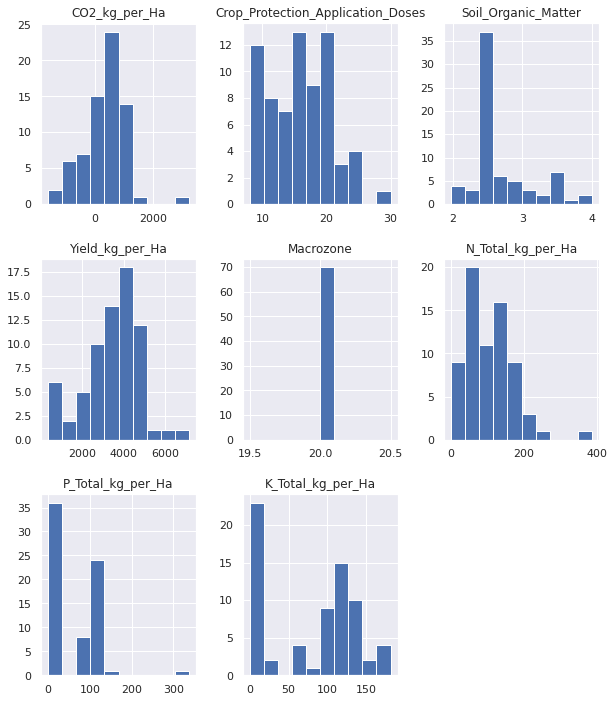

In [140]:
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
df[df['Macrozone'] == 20].hist(ax = ax)

Text(0, 0.5, 'Yield_kg_per_Ha')

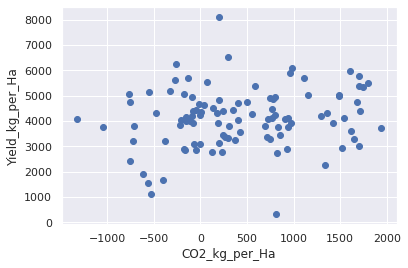

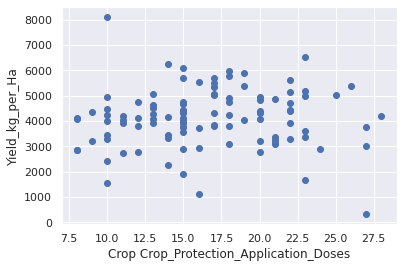

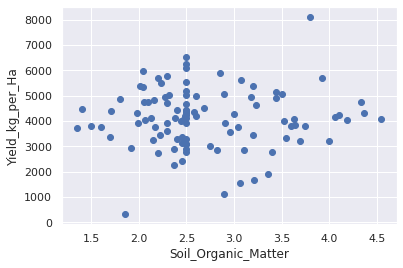

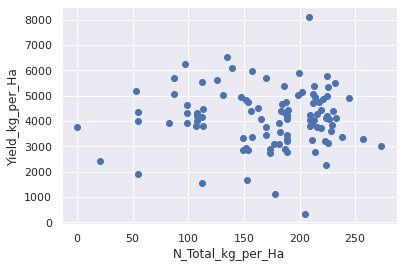

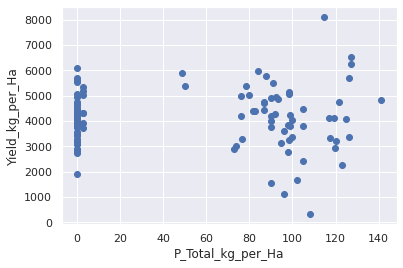

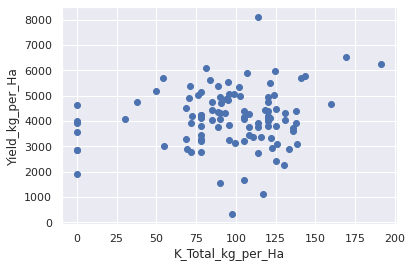

In [135]:
df = df[df['Macrozone'] == 7]

plt.figure()
plt.scatter(df['CO2_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.xlabel('CO2_kg_per_Ha')
plt.ylabel('Yield_kg_per_Ha')

plt.figure()
plt.scatter(df['Crop_Protection_Application_Doses'], df['Yield_kg_per_Ha'])
plt.xlabel('Crop Crop_Protection_Application_Doses')
plt.ylabel('Yield_kg_per_Ha')

plt.figure()
plt.scatter(df['Soil_Organic_Matter'], df['Yield_kg_per_Ha'])
plt.xlabel('Soil_Organic_Matter')
plt.ylabel('Yield_kg_per_Ha')

plt.figure()
plt.scatter(df['N_Total_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.xlabel('N_Total_kg_per_Ha')
plt.ylabel('Yield_kg_per_Ha')

plt.figure()
plt.scatter(df['P_Total_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.xlabel('P_Total_kg_per_Ha')
plt.ylabel('Yield_kg_per_Ha')

plt.figure()
plt.scatter(df['K_Total_kg_per_Ha'], df['Yield_kg_per_Ha'])
plt.xlabel('K_Total_kg_per_Ha')
plt.ylabel('Yield_kg_per_Ha')

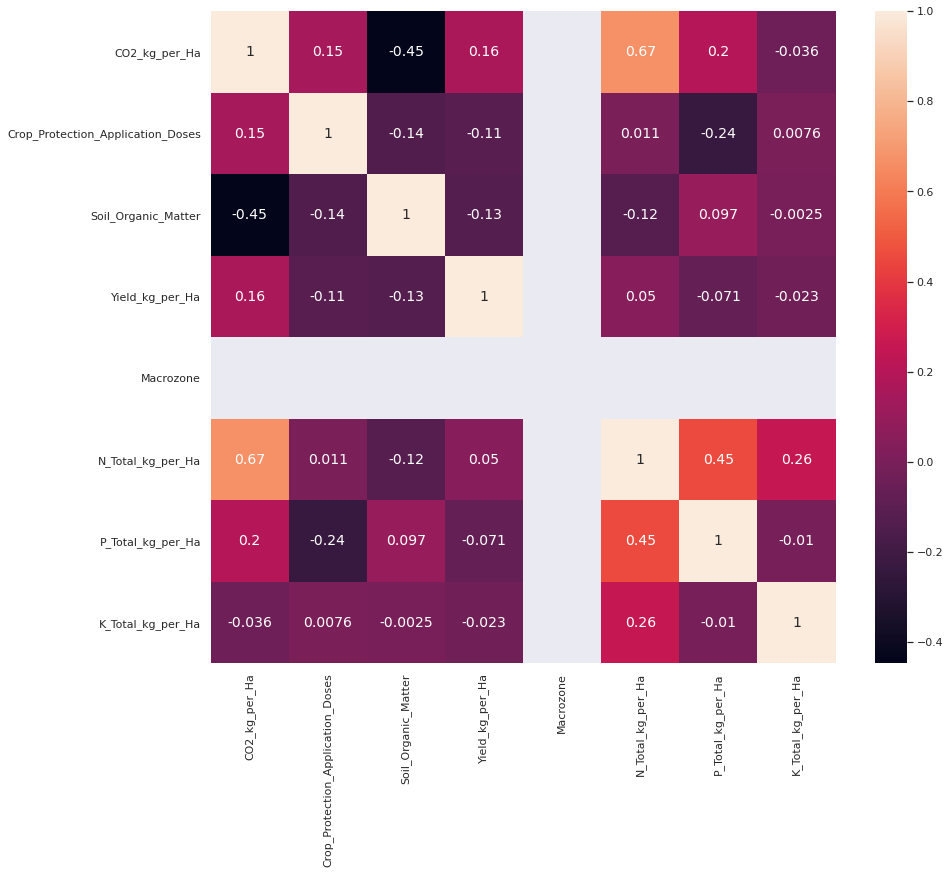

In [141]:
corr_matrix = df[df['Macrozone'] == 20].corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize":14})
sns.set(font_scale = 1)
plt.show()

/tmp/ipykernel_378/2253914049.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df['Macrozone'] == 22].hist(ax = ax)


array([[<AxesSubplot:title={'center':'CO2_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'Crop_Protection_Application_Doses'}>,
        <AxesSubplot:title={'center':'Soil_Organic_Matter'}>],
       [<AxesSubplot:title={'center':'Yield_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'Macrozone'}>,
        <AxesSubplot:title={'center':'N_Total_kg_per_Ha'}>],
       [<AxesSubplot:title={'center':'P_Total_kg_per_Ha'}>,
        <AxesSubplot:title={'center':'K_Total_kg_per_Ha'}>,
        <AxesSubplot:>]], dtype=object)

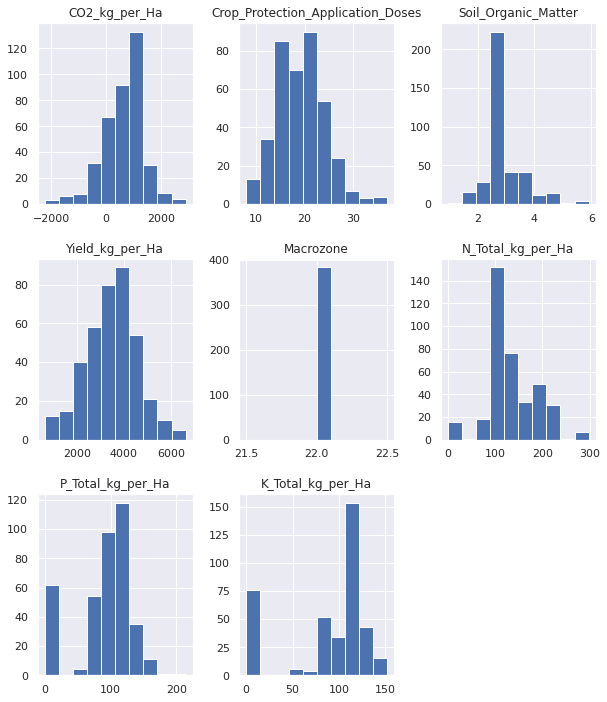

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21:48:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1462.811779408934


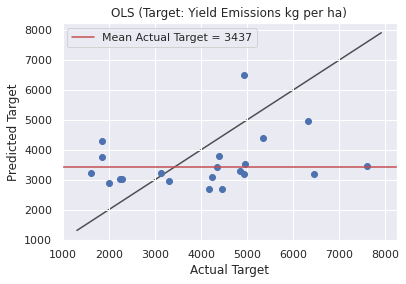

Lasso
MAE on test data: 1462.7627307522616


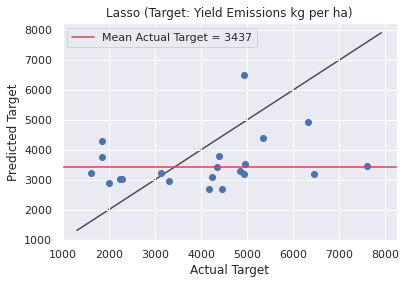

Ridge
MAE on test data: 1452.5594400455186


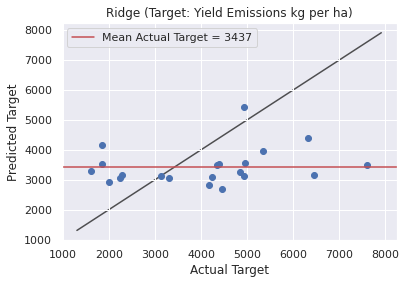

ElasticNet
MAE on test data: 1462.7331716292033


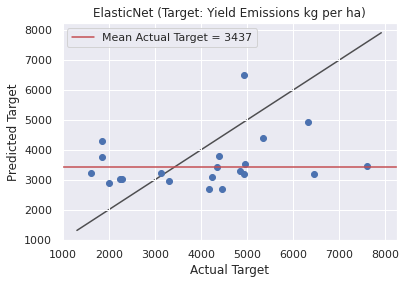

SVR
MAE on test data: 1540.8869200403426


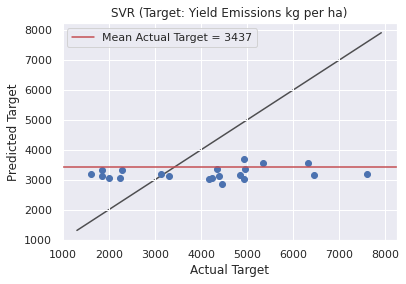

Lightgbm
MAE on test data: 1294.506862706423


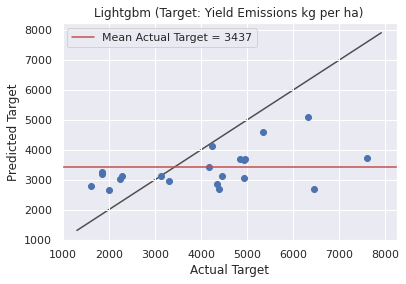

GBR
MAE on test data: 1130.4182468154852


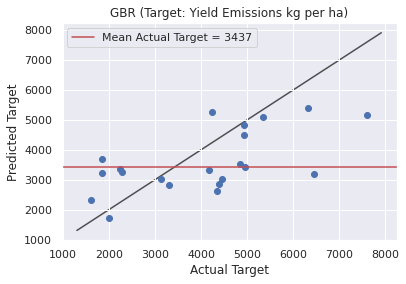

XGBoost
MAE on test data: 1195.9295338446027


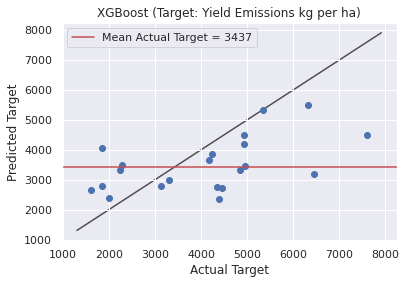

In [143]:
###############
### BUILD 1 ###
###############

#smaller macrozone

df = df[df['Macrozone'] == 17].reset_index(drop = True)
df = df.drop(columns = ['Field_Name', 'Macrozone'])

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()